In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sfp_nsdsyn as sfp
import sfp_nsdsyn.visualization as vis
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

# Load parameter files

In [143]:
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'broderick'
full_ver= [True]
if dataset == 'nsdsyn':
    sn_list = np.arange(1,9)
    stat = 'mean'
elif dataset == 'broderick':
    sn_list=[1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
    stat = 'median'
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1']
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'

In [144]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', roi_list)
final_params = all_model_history.query('epoch == 29999')

In [145]:
final_params

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,lr_rate,max_epoch,full_ver,subj,vroinames
29999,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,0.0005,30000,True,sub-wlsubj001,V1
59999,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,0.0005,30000,True,sub-wlsubj006,V1
89999,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,0.0005,30000,True,sub-wlsubj007,V1
119999,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,0.0005,30000,True,sub-wlsubj045,V1
149999,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,0.0005,30000,True,sub-wlsubj046,V1
179999,29999,2.115541,0.132440,0.323145,-0.033379,-0.018277,-0.122890,0.097172,0.064806,-0.021059,broderick,0.0005,30000,True,sub-wlsubj062,V1
209999,29999,2.130340,0.136759,0.284252,0.091025,-0.036157,0.023343,0.001187,0.025593,0.001959,broderick,0.0005,30000,True,sub-wlsubj064,V1
239999,29999,2.249078,0.079767,0.374599,0.044345,-0.077721,0.177016,0.003899,0.037286,0.005977,broderick,0.0005,30000,True,sub-wlsubj081,V1
269999,29999,2.300413,0.121761,0.466371,0.125765,-0.021344,0.136857,-0.083407,-0.019852,0.014446,broderick,0.0005,30000,True,sub-wlsubj095,V1
299999,29999,2.089035,0.128973,0.312971,0.111180,-0.003874,0.062324,-0.035700,0.094206,-0.024604,broderick,0.0005,30000,True,sub-wlsubj114,V1


 ## melt final_params variable

In [146]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]

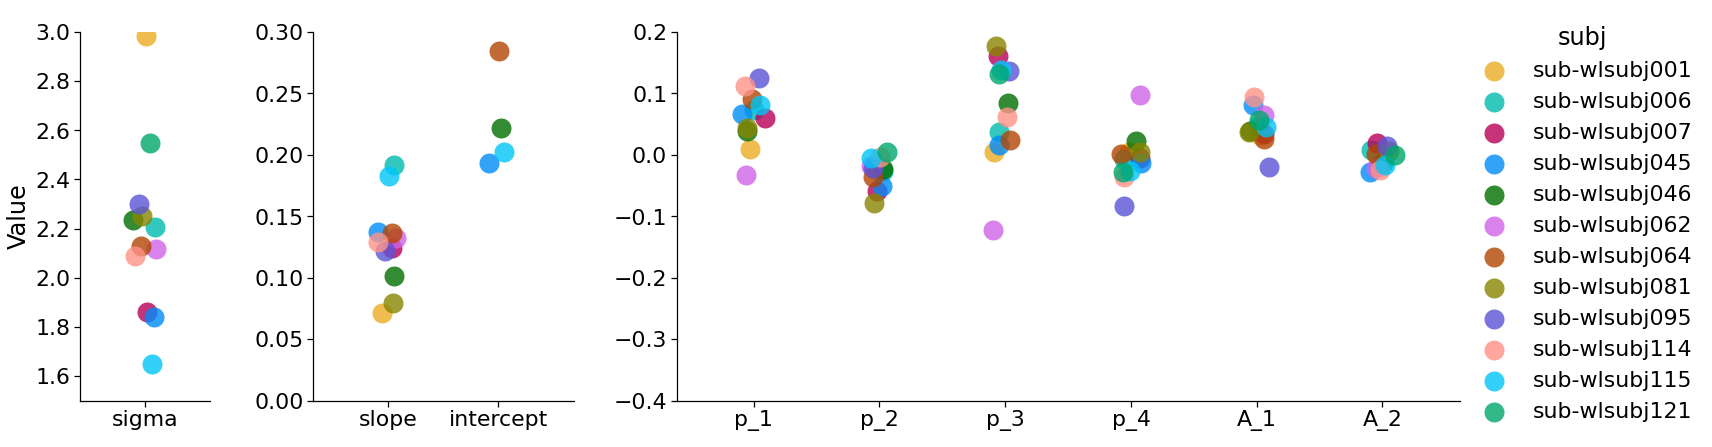

In [147]:
vis.plot_2D_model_results.plot_individual_parameters(final_params, params, group, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_individual.png'))

## Precision-weighted averaged parameters

In [153]:
all_subj_df_mean = pd.DataFrame({})

In [ ]:
for sn in sn_list:
    subj = sfp.utils.sub_number_to_string(sn, dataset)
    subj_df = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}/{subj}_stim_voxel_info_df_vs-pRFsigma_V1.csv')
    subj_df = subj_df.drop_duplicates(['voxel'])
    subj_df = subj_df[['subj','sigma_v_squared']].groupby('subj').mean().reset_index()
    subj_df = subj_df.rename(columns={'sigma_v_squared': 'sigma_squared_s'})
    print(f'{sn}')
    all_subj_df_mean = all_subj_df_mean.append(subj_df)

1
6
7
45
46
62


In [150]:
all_subj_df_mean['sigma_squared_s'] = 1/all_subj_df_mean['sigma_squared_s']

In [151]:
new_final_params = pd.merge(final_params, all_subj_df_mean[['subj','sigma_squared_s']], on='subj')

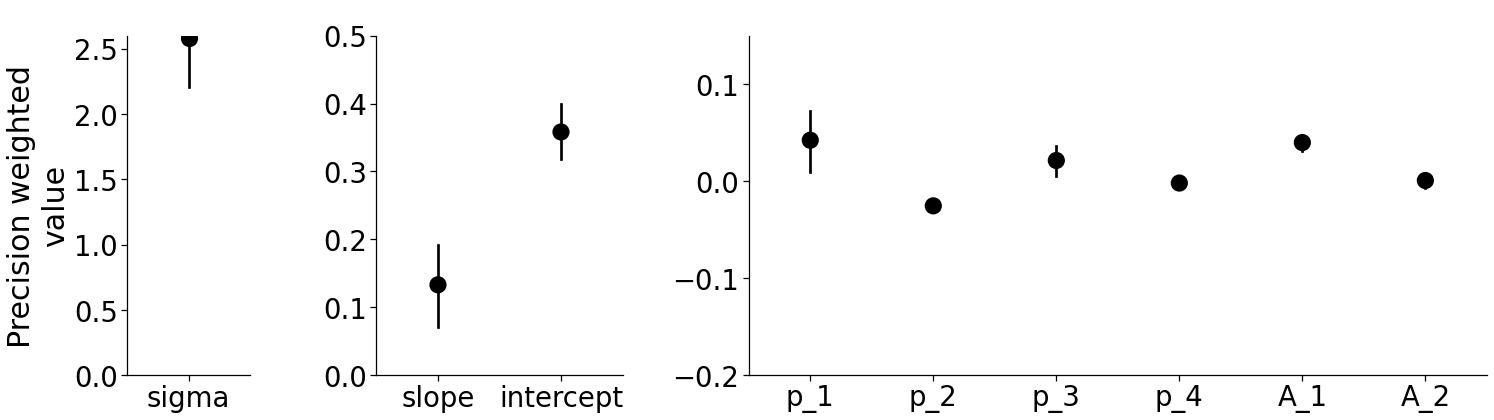

In [152]:
grid = vis.plot_2D_model_results.plot_precision_weighted_avg_parameters(new_final_params, params, group, save_fig=True, save_path=os.path.join(fig_dir, f'{dataset}_precision_weighted_avg.png'))

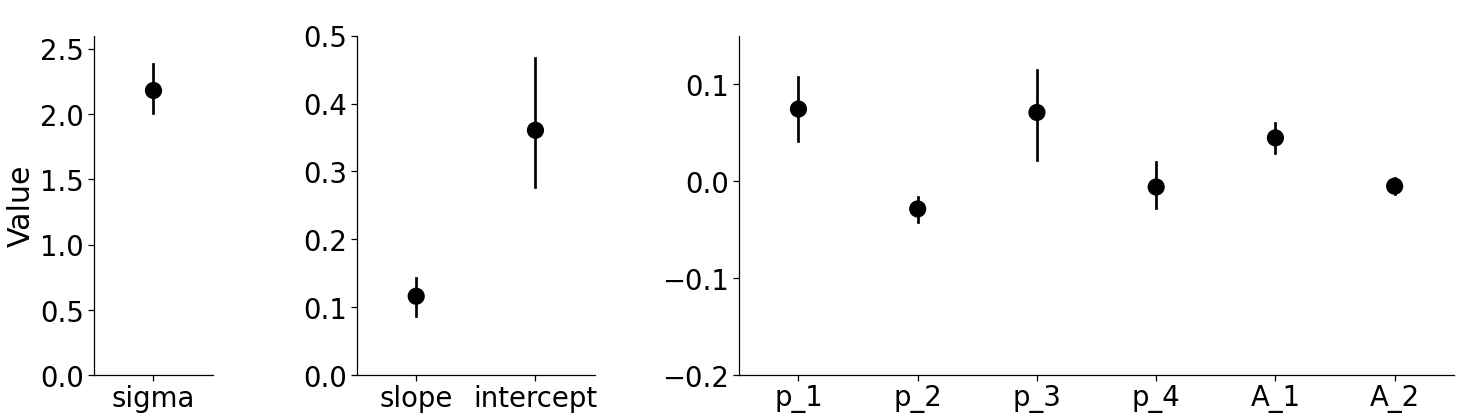

In [79]:
grid = vis.plot_2D_model_results.plot_avg_parameters(final_params, params, group, save_fig=False, save_path=os.path.join(fig_dir, f'{dataset}_avg.png'))

In [82]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[['names','names_idx','w_r','w_a','phase','class_idx','freq_lvl']]
stim_info = stim_info.drop_duplicates('names').drop(columns=['names_idx','phase','class_idx','freq_lvl'])
display(stim_info)

,names,w_r,w_a
0,pinwheel,0.0,6.0
24,forward spiral,4.0,4.0
48,annulus,6.0,0.0
72,reverse spiral,4.0,-4.0
96,intermediate 1,14.0,34.0
100,intermediate 2,34.0,14.0
104,intermediate 3,34.0,-14.0
108,intermediate 4,14.0,-34.0


In [83]:
all_ecc_model_params = vis.plot_2D_model_results.merge_continuous_values_to_the_df(stim_info, val_range=(0,10), repeat=3, col_name='eccentricity')

In [84]:
all_angle_model_params = vis.plot_2D_model_results.merge_continuous_values_to_the_df(all_ecc_model_params, val_range=(0,360), repeat=360, col_name='angle')
display(all_angle_model_params.head())
print(all_angle_model_params.shape)

,names,w_r,w_a,eccentricity,angle
0,pinwheel,0.0,6.0,0.0,0.0
1,forward spiral,4.0,4.0,0.0,0.0
2,annulus,6.0,0.0,0.0,0.0
3,reverse spiral,4.0,-4.0,0.0,0.0
4,intermediate 1,14.0,34.0,0.0,0.0


(8640, 5)


In [85]:
synthetic_stim_df = sfp.preprocessing._calculate_local_orientation(all_angle_model_params)
display(synthetic_stim_df)

,names,w_r,w_a,eccentricity,angle,local_ori
0,pinwheel,0.0,6.0,0.0,0.0,1.570796
1,forward spiral,4.0,4.0,0.0,0.0,0.785398
2,annulus,6.0,0.0,0.0,0.0,0.000000
3,reverse spiral,4.0,-4.0,0.0,0.0,2.356194
4,intermediate 1,14.0,34.0,0.0,0.0,1.180189
...,...,...,...,...,...,...
8635,reverse spiral,4.0,-4.0,10.0,360.0,2.356194
8636,intermediate 1,14.0,34.0,10.0,360.0,1.180189
8637,intermediate 2,34.0,14.0,10.0,360.0,0.390607
8638,intermediate 3,34.0,-14.0,10.0,360.0,2.750986


In [86]:
synthetic_stim_df['angle'] = np.deg2rad(synthetic_stim_df['angle'])
synthetic_stim_df.tail()

,names,w_r,w_a,eccentricity,angle,local_ori
8635,reverse spiral,4.0,-4.0,10.0,6.283185,2.356194
8636,intermediate 1,14.0,34.0,10.0,6.283185,1.180189
8637,intermediate 2,34.0,14.0,10.0,6.283185,0.390607
8638,intermediate 3,34.0,-14.0,10.0,6.283185,2.750986
8639,intermediate 4,14.0,-34.0,10.0,6.283185,1.961403


In [113]:
all_subj_df = pd.DataFrame({})
for sn in sn_list:
    subj = sfp.utils.sub_number_to_string(sn, dataset=dataset)
    subj_df = synthetic_stim_df.copy()
    subj_df['subj'] = subj
    subj_df['Pv'] = subj_df.apply(sfp.two_dimensional_model.get_Pv_row, params=final_params.query('subj == @subj'), axis=1)
    all_subj_df = all_subj_df.append(subj_df, ignore_index=True)

print(all_subj_df.shape)

(103680, 8)


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,subj
0,30.943945,0.736502,4.147957,0.103279,-0.244299,0.052739,0.042188,0.326245,-0.072591,sub-wlsubj001


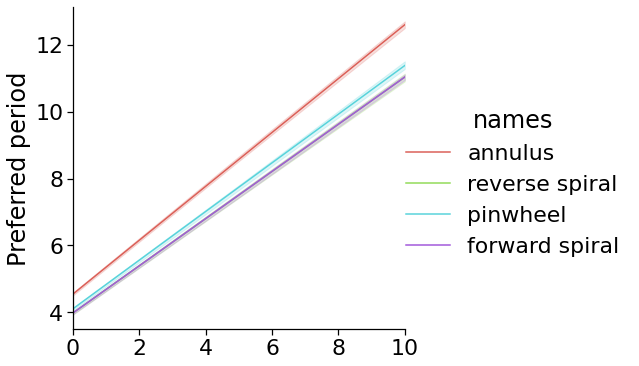

In [114]:
stim_class = ['pinwheel','annulus','forward spiral','reverse spiral']
subj = 'sub-wlsubj001'
display(weighted_final_params.query('subj == @subj'))
vis.plot_2D_model_results.plot_preferred_period(all_subj_df.query('names in @stim_class & subj == @subj'), col=None)

In [120]:
params = weighted_final_params.query('subj == "sub-wlsubj001"').iloc[0]
params

sigma            30.943945
slope             0.736502
intercept         4.147957
p_1               0.103279
p_2              -0.244299
p_3               0.052739
p_4               0.042188
A_1               0.326245
A_2              -0.072591
subj         sub-wlsubj001
Name: 0, dtype: object

In [126]:
test = all_subj_df.query('subj == "sub-wlsubj001" & names == "pinwheel"')
test = test.iloc[0:2,:]
test['ecc_dependency'] = params['slope']*test['eccentricity']+params['intercept']
test

,names,w_r,w_a,eccentricity,angle,local_ori,subj,Pv,ecc_dependency
0,pinwheel,0.0,6.0,0.0,0.0,1.570796,sub-wlsubj001,2.662454,4.147957
8,pinwheel,0.0,6.0,5.0,0.0,1.570796,sub-wlsubj001,5.026152,7.830468


In [122]:
a = 1 + params.p_1 * np.cos(2 * test.local_ori) + params.p_2 * np.cos(4 * test.local_ori) + params.p_3 * np.cos(2 * (test.local_ori - test.angle)) + params.p_4 * np.cos(4 * (test.local_ori - test.angle))

In [133]:
params.join(weighted_final_params.query('subj == "sub-wlsubj001"'))

AttributeError: 'Series' object has no attribute 'join'

In [140]:
test_df = pd.merge(test, weighted_final_params.query('subj == "sub-wlsubj001"')).iloc[1]
display(test_df)
test_df['ecc_dependency'] = test_df['slope']*test_df['eccentricity']+test_df['intercept']
test_df['ecc_dependency']*(1+test_df.p_1*np.cos(2*test_df.local_ori)+
                           test_df.p_2*np.cos(4*test_df.local_ori)+
                           test_df.p_3*np.cos(2*(test_df.local_ori-test_df.angle))+
                           test_df.p_4*np.cos(4*(test_df.local_ori-test_df.angle)))

names                  pinwheel
w_r                         0.0
w_a                         6.0
eccentricity                5.0
angle                       0.0
local_ori              1.570796
subj              sub-wlsubj001
Pv                     5.026152
ecc_dependency         7.830468
sigma                 30.943945
slope                  0.736502
intercept              4.147957
p_1                    0.103279
p_2                   -0.244299
p_3                    0.052739
p_4                    0.042188
A_1                    0.326245
A_2                   -0.072591
Name: 1, dtype: object

5.026152141537717

In [112]:
test.apply(sfp.two_dimensional_model.get_Pv_row, params=weighted_final_params.query('subj == "sub-wlsubj001"'), axis=1)

,0
0,2.662454
8,5.026152


In [91]:
all_subj_df.names.unique()

array(['pinwheel', 'forward spiral', 'annulus', 'reverse spiral',
       'intermediate 1', 'intermediate 2', 'intermediate 3',
       'intermediate 4'], dtype=object)

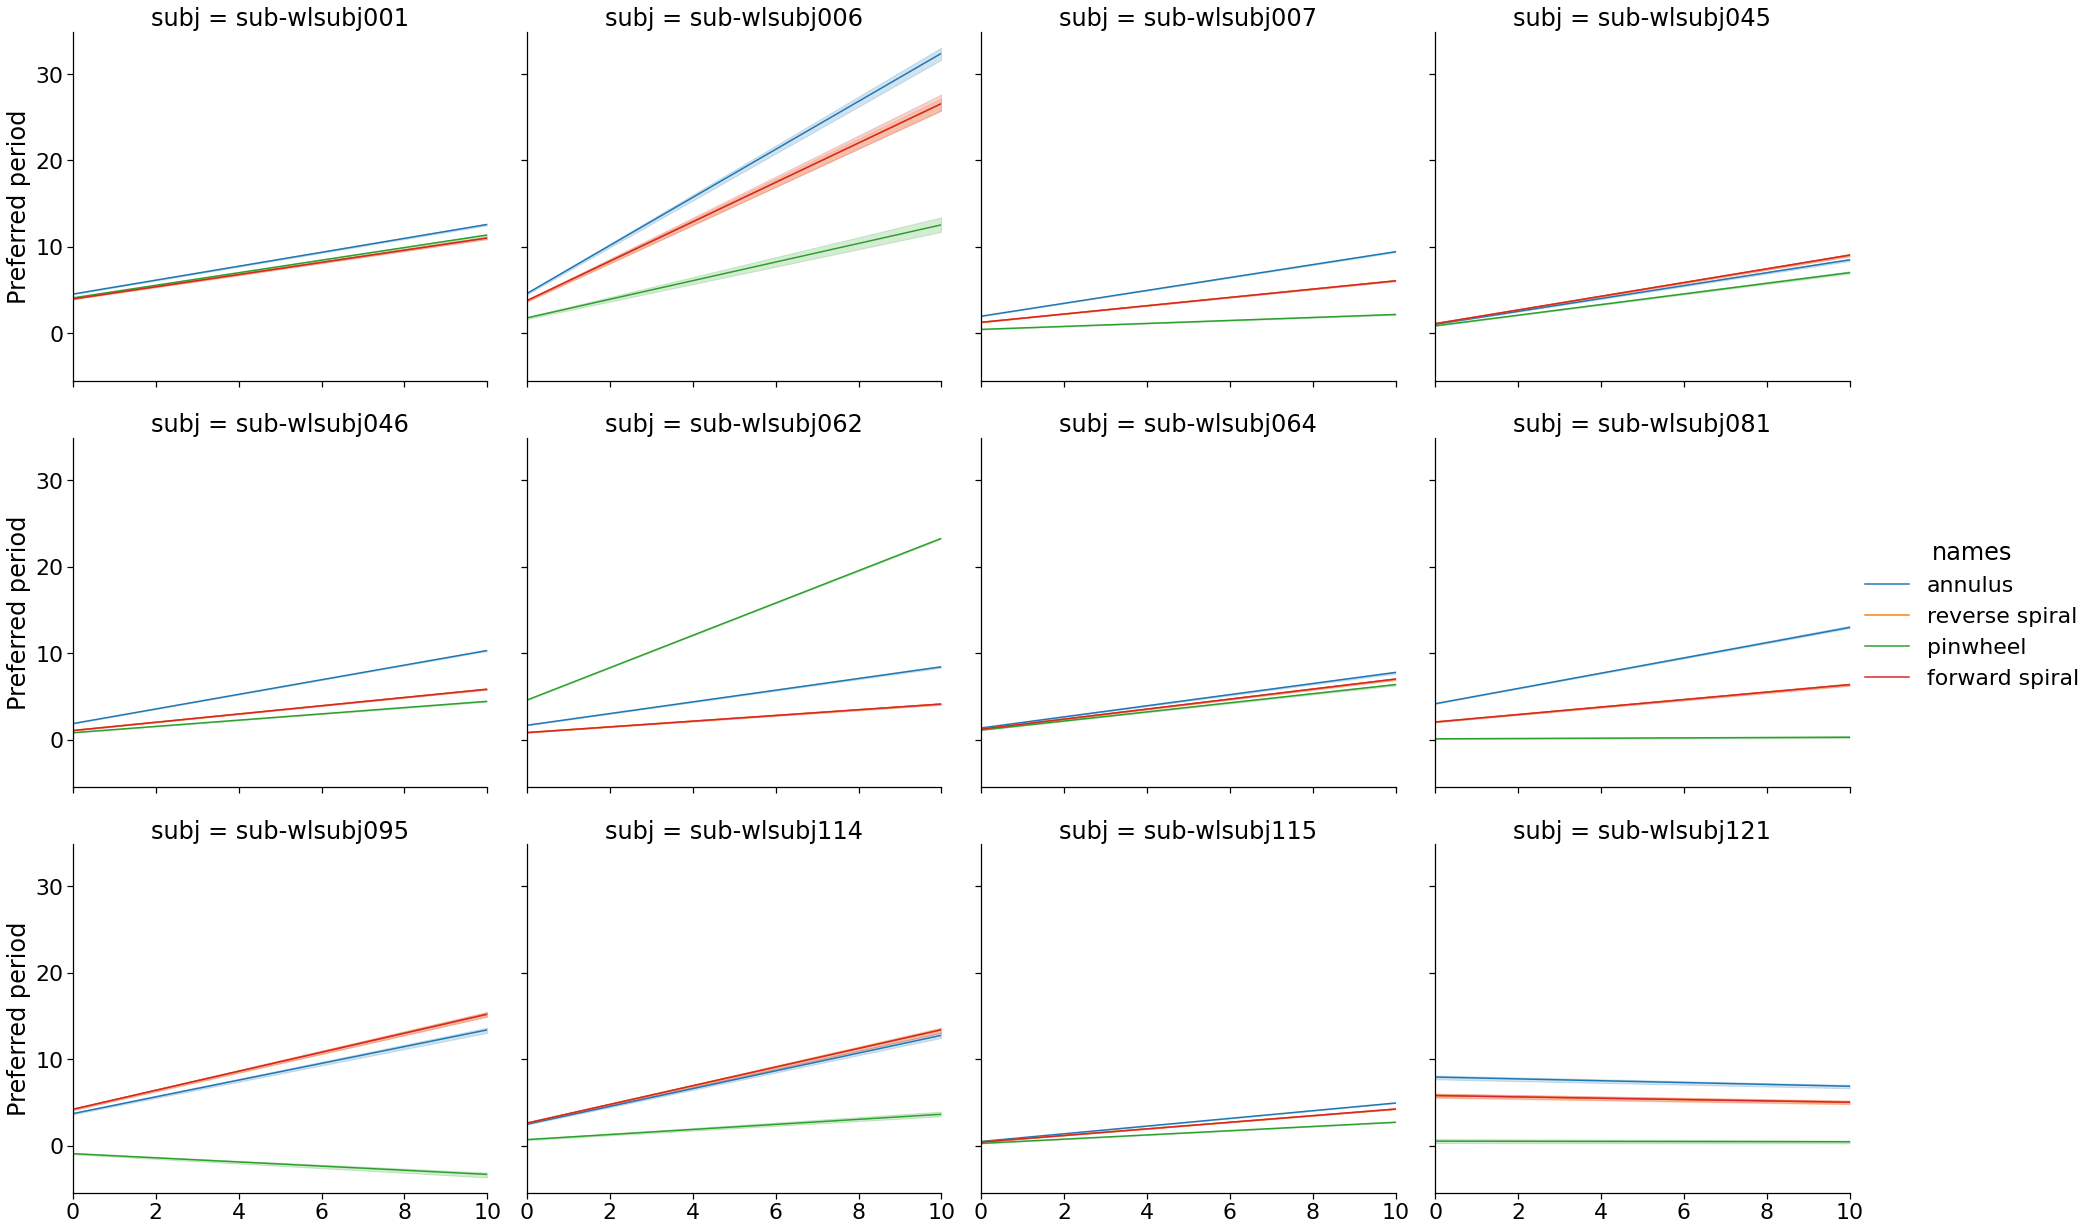

In [58]:
stim_class = ['pinwheel','annulus','forward spiral','reverse spiral']
vis.plot_2D_model_results.plot_preferred_period(all_subj_df.query('names in @stim_class'))

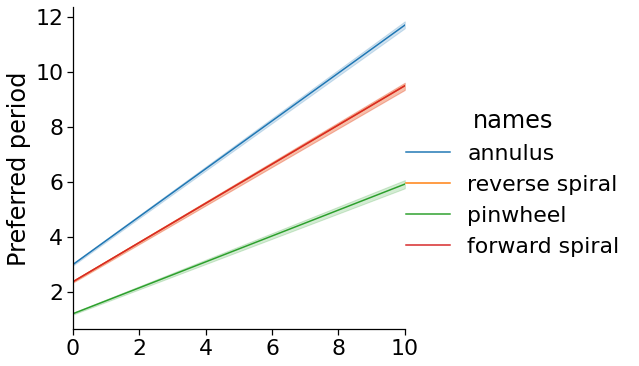

In [59]:
vis.plot_2D_model_results.plot_preferred_period(all_subj_df.query('names in @stim_class'), col=None)

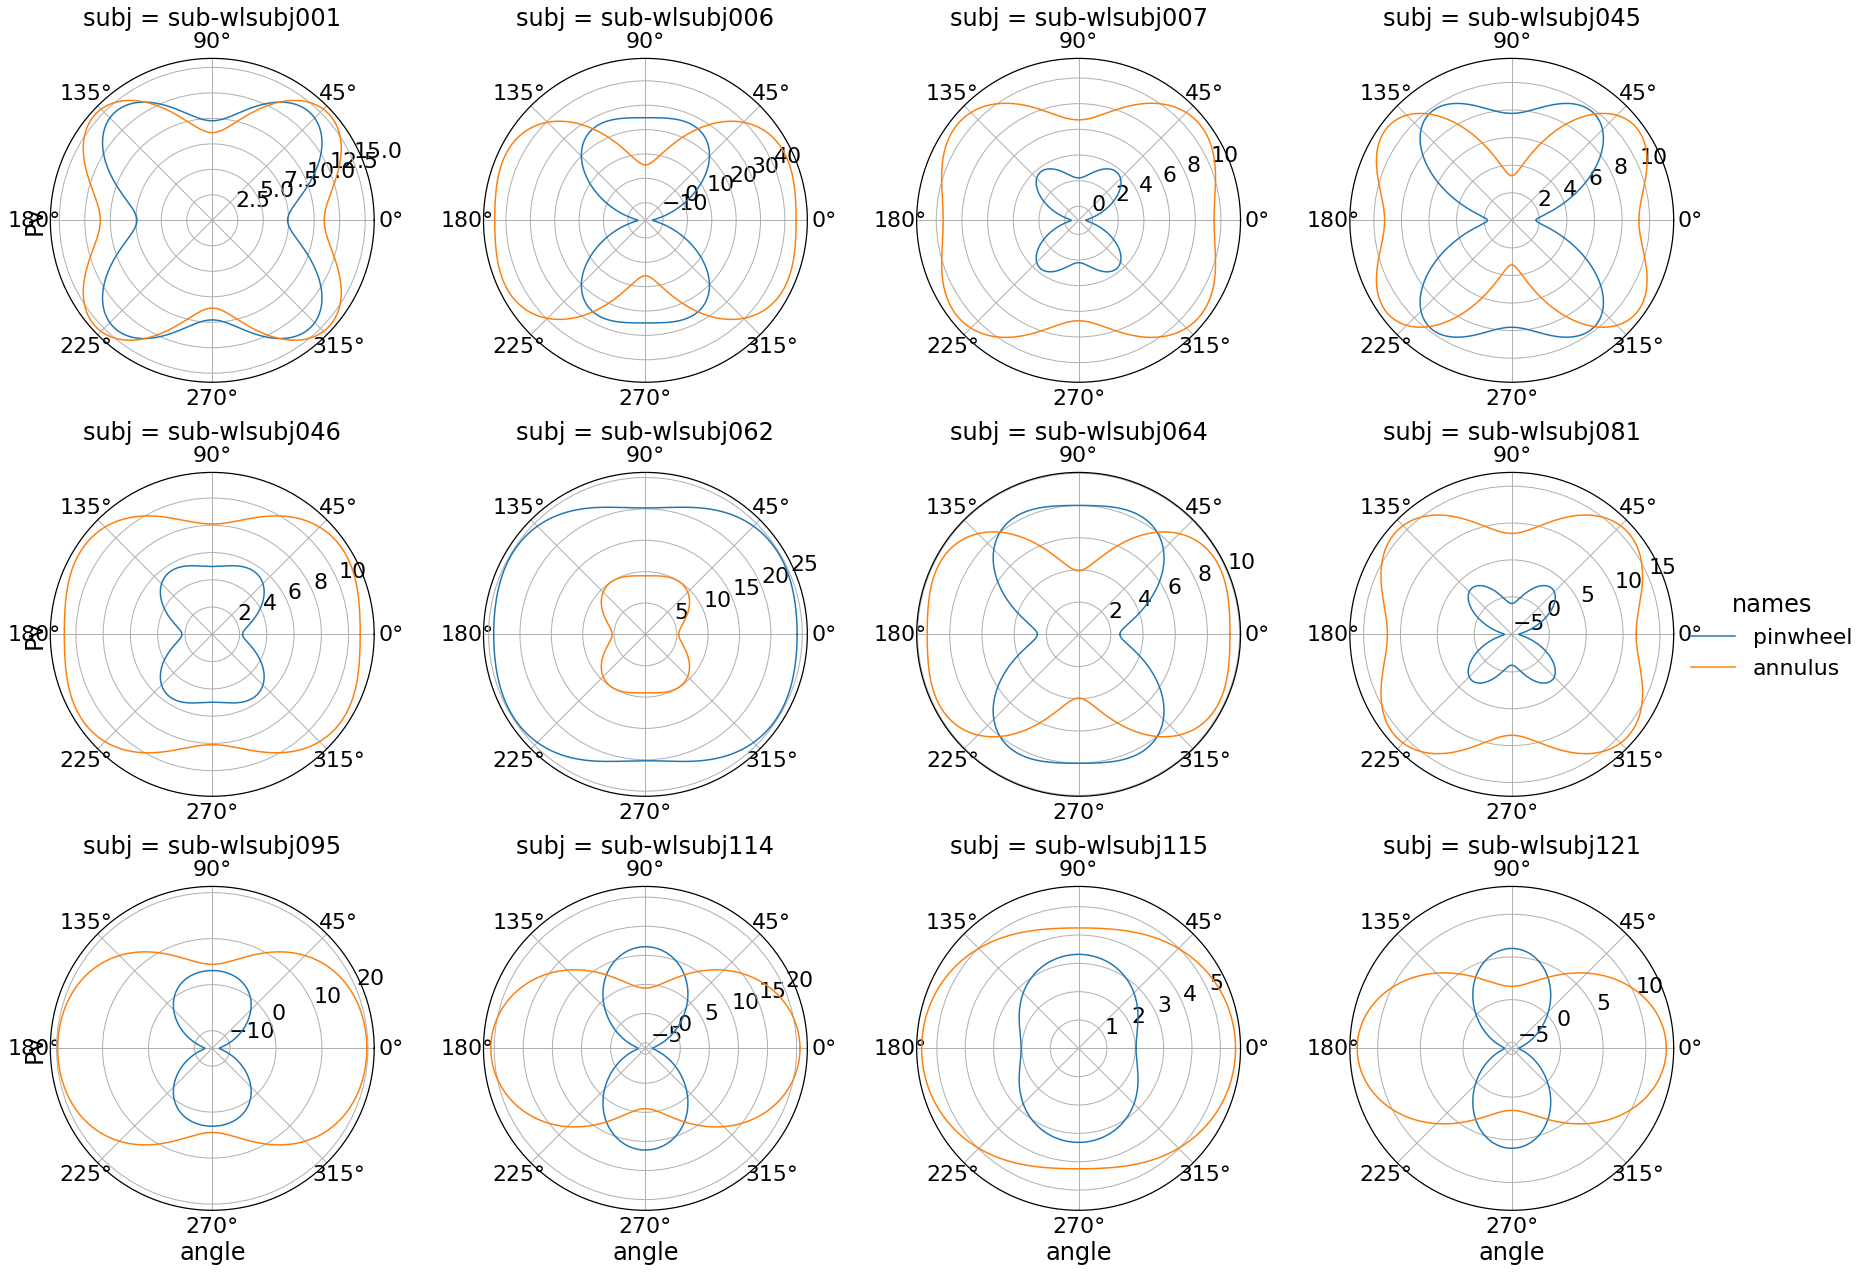

In [55]:
stim_class = ['pinwheel','annulus']
vis.plot_2D_model_results.polarplot_preferred_period(all_subj_df.query('names in @stim_class & eccentricity == 10'), col='subj')

In [ ]:
vis.plot_2D_model_results.polarplot_preferred_period(all_subj_df.query('names in @stim_class & eccentricity == 2.5'), col=None)